# Importing Libraries

In [3]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import os
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from bs4 import BeautifulSoup
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Importing Datasets

The Kaggle competition provides a training dataset and a testing dataset to use. The datasets are made of real tweets, and will require pre-processing steps before any training step.

In [4]:
# Import Train Test set
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


# EDA

Printing Unique Keywords

In [6]:
keywords = set(train['keyword'].tolist())
print(keywords)

{nan, 'armageddon', 'fatalities', 'burning', 'derailed', 'cyclone', 'smoke', 'hijacking', 'snowstorm', 'demolition', 'collide', 'demolish', 'hazard', 'sunk', 'evacuated', 'mudslide', 'body%20bagging', 'hijacker', 'death', 'lightning', 'panicking', 'burned', 'destruction', 'rescued', 'harm', 'body%20bags', 'attack', 'destroy', 'army', 'electrocuted', 'meltdown', 'quarantined', 'flooding', 'landslide', 'bioterrorism', 'screamed', 'fatality', 'forest%20fires', 'mass%20murder', 'cliff%20fall', 'casualties', 'aftershock', 'inundated', 'stretcher', 'terrorism', 'structural%20failure', 'first%20responders', 'drowning', 'burning%20buildings', 'detonation', 'bush%20fires', 'drown', 'hazardous', 'hostages', 'refugees', 'weapons', 'exploded', 'ablaze', 'injury', 'survive', 'suicide%20bomber', 'apocalypse', 'bloody', 'destroyed', 'displaced', 'rescue', 'deluge', 'emergency%20services', 'crush', 'hurricane', 'demolished', 'panic', 'obliteration', 'catastrophic', 'mass%20murderer', 'trauma', 'surviv

Dataset info

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


Null counts for each feature in each dataset

In [10]:
# null count
print("Null counts for train dataset:")
print(train.isna().sum())
print("Null counts for test dataset:")
print(test.isna().sum())

Null counts for train dataset:
id             0
keyword       61
location    2533
text           0
target         0
dtype: int64
Null counts for test dataset:
id             0
keyword       26
location    1105
text           0
dtype: int64


Plotting Null counts by dataset

Text(0.5, 1.0, 'NaN Counts by Dataset')

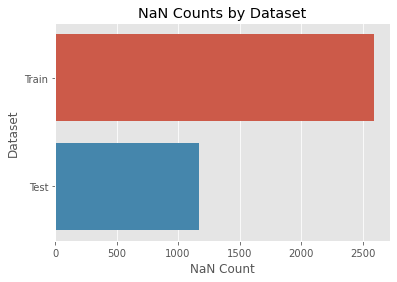

In [35]:
# plot null count by dataset
train_null_count = int(train['keyword'].isna().sum()) + int(train['location'].isna().sum())
test_null_count = int(train['keyword'].isna().sum()) + + int(test['location'].isna().sum())

nullcount = [["Train", train_null_count], ["Test", test_null_count]]
nulldf = pd.DataFrame(nullcount, columns = ["Dataset", "NaN Count"])

plt.style.use('ggplot')

sns.barplot(x='NaN Count', y='Dataset', data = nulldf)
plt.title('NaN Counts by Dataset')

Plotting Null counts by feature

Text(0.5, 1.0, 'NaN Counts by Feature')

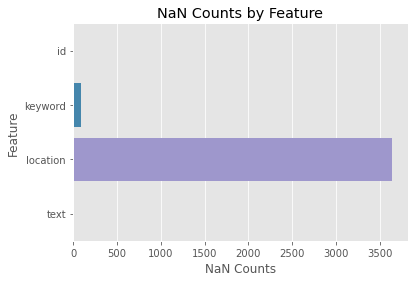

In [36]:
# count null values by feature
counts = []

for i in range(len(train.columns) - 1):
    counts.append(0)
for i in range(len(train.columns) - 1):
    counts[i] += train[train.columns[i]].isna().sum()
    counts[i] += test[test.columns[i]].isna().sum()

# build dataframe for nan counts
d = {"Feature": train.columns[:len(train.columns)-1], "NaN Counts": counts}
null_feat_df = pd.DataFrame(data=d)

# plotting 
plt.style.use('ggplot')
sns.barplot(x='NaN Counts', y='Feature', data = null_feat_df)
plt.title('NaN Counts by Feature')

Each tweet gets classified as a disaster tweet or not, which is represented as a binary value